In [4]:
import os
import numpy as np
import pandas as pd
from contextlib import contextmanager
from IPython.display import HTML, display
import json
import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
DATA_FOLDER = os.path.join('..','..','..', 'data', 'workshop_1')
def resolve_path(*path):
    return os.path.join(DATA_FOLDER,*path)

@contextmanager
def show_complete_array(n=10):
    oldoptions = np.get_printoptions()
    np.set_printoptions(threshold=n)
    yield 
    np.set_printoptions(**oldoptions)

def print_df_inf(df):
    table = [(column,len(df[column].unique()),df[column].unique()) for column in df.columns]
    print("Клонки содержащие пустые значения: ", df.columns[df.isnull().any()].tolist())
    print("Всего строк: {:,}".format(len(df)))
    with show_complete_array():
        display(HTML(tabulate.tabulate(table, tablefmt='html',headers=['Имя параметра','Количество уникальных значений','Примеры уникальных значений'])))




In [58]:
df=pd.DataFrame.from_csv(resolve_path('csv','problems_source.csv'))
# df=df_s.sample(n=int(len(df_s)*.05), replace=True, random_state=42)
# df=df.append(df_s[df_s['status']=='Не удовлетворён'])

In [59]:
df.head()

,address,building,category,city_object,district,is_public,latitude,longitude,municipality,reason,status,type_of,url
id,,,,,,,,,,,,,
824292,"г.Санкт-Петербург, улица Профессора Попова, до...",66093.0,10,1,7,False,59.970724,30.320438,146.0,35,Модерация,building,NaN
824291,NaN,NaN,3,3,7,False,59.968716,30.308962,146.0,54,Модерация,point,NaN
824290,NaN,NaN,3,3,36,False,60.008748,30.325581,78.0,78,Модерация,point,NaN
824289,"г.Санкт-Петербург, проспект Культуры, дом 29, ...",96138.0,15,5,10,False,60.049485,30.380597,90.0,48,Рассмотрение,building,NaN
824288,"г.Санкт-Петербург, бульвар Новаторов, дом 19, ...",91107.0,10,1,15,False,59.849157,30.264467,92.0,35,Рассмотрение,building,NaN


In [60]:
print_df_inf(df)

Клонки содержащие пустые значения:  ['address', 'building', 'municipality', 'url']
Всего строк: 820,028


Имя параметра,Количество уникальных значений,Примеры уникальных значений
address,34260,"['г.Санкт-Петербург, улица Профессора Попова, дом 2, литера Б' nan 'г.Санкт-Петербург, проспект Культуры, дом 29, корпус 1, литера А' ..., 'город Петергоф, Князевская улица, дом 22, литера А' 'г.Санкт-Петербург, улица Моисеенко, дом 43' 'город Пушкин, Новодеревенская улица, дом 16, литера А']"
building,34356,"[ 66093. nan 96138. ..., 126901. 74841. 54901.]"
category,62,"[10 3 15 ..., 14 30 6]"
city_object,19,"[ 1 3 5 ..., 12 16 7]"
district,18,"[ 7 36 10 ..., 38 32 13]"
is_public,2,[False True]
latitude,195824,"[ 59.9707241 59.968716 60.0087482 ..., 59.8510976 59.9213086 59.9519954]"
longitude,201030,"[ 30.3204382 30.3089618 30.3255808 ..., 30.359088 30.3600442 30.2171886]"
municipality,112,"[ 146. 78. 90. ..., 126. 103. nan]"
reason,251,"[35 54 78 ..., 21 1 27]"


In [80]:
city_objects=pd.DataFrame.from_csv(resolve_path('csv','city_objects.csv'))
categories=pd.DataFrame.from_csv(resolve_path('csv','categories.csv'))
reasons=pd.DataFrame.from_csv(resolve_path('csv','reasos.csv'))
districts=pd.DataFrame.from_csv(resolve_path('csv','districts.csv'))

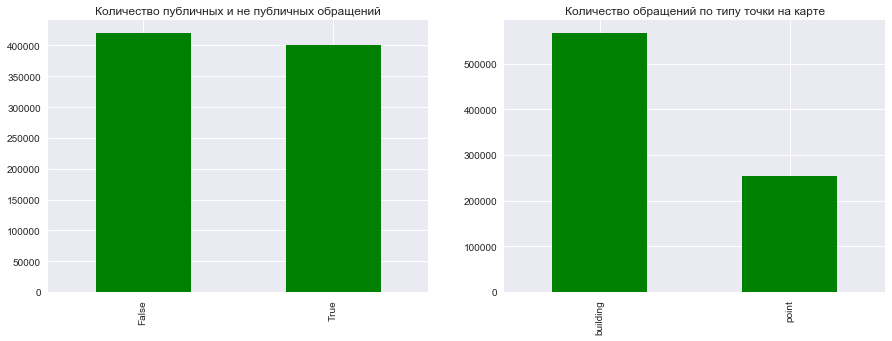

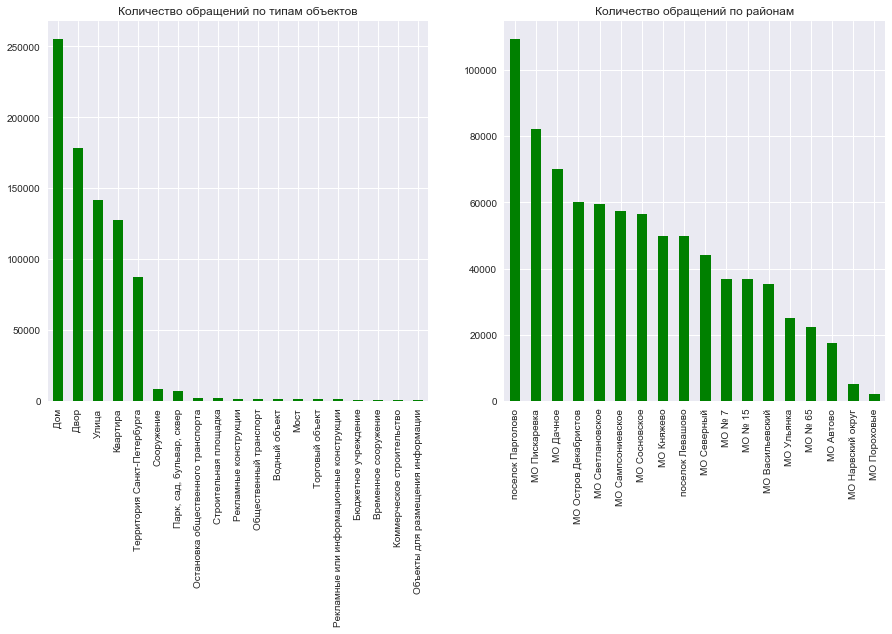

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5) )

axes[0] = df['is_public'].value_counts().plot(kind='bar',ax=axes[0],color='g')
axes[0].set_title("Количество публичных и не публичных обращений");

axes[1] = df['type_of'].value_counts().plot(kind='bar',ax=axes[1],color='g')
axes[1].set_title("Количество обращений по типу точки на карте");

# axes[2] = df['status'].value_counts().plot(kind='bar',ax=axes[2],color='g')
# axes[2].set_title("Количество обращений по статусам");

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7) )
axes[0] = df['city_object'].value_counts().plot(kind='bar',ax=axes[0],color='g')
axes[0].set_title("Количество обращений по типам объектов");
axes[0].set_xticklabels(city_objects.loc[df['city_object'].value_counts().index.values]['name'],ha="center");

axes[1] = df['district'].value_counts().plot(kind='bar',ax=axes[1],color='g')
axes[1].set_title("Количество обращений по районам");
axes[1].set_xticklabels(districts.iloc[df['district'].value_counts().index.values]['name'],ha="center");



,counts
status,
Модерация,615
Не удовлетворён,1
Отклонено,65506
Получен ответ,458788
Промежуточный ответ,25405
Рассмотрение,16308


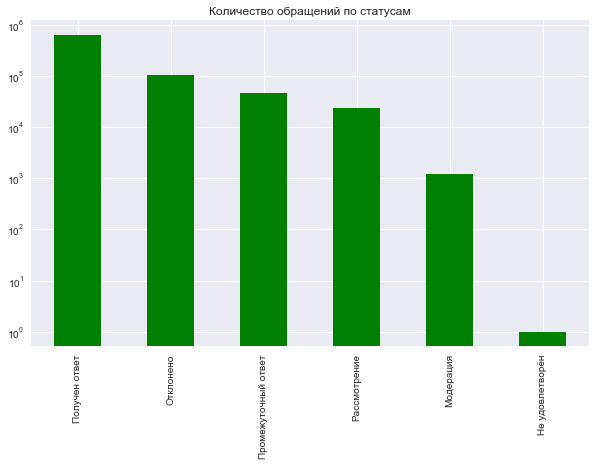

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6) )
ax = df['status'].value_counts().plot(kind='bar',ax=ax,color='g',logy=True)
ax.set_title("Количество обращений по статусам");
pf = pd.DataFrame(df.groupby('status')['building'].count())
pf.columns=['counts']
pf

### Матрица корреляции признаков

In [17]:
def plot_corr(corr,colunms):
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(10,7)) 
        sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                    xticklabels=colunms,
                    yticklabels=colunms, ax=ax);

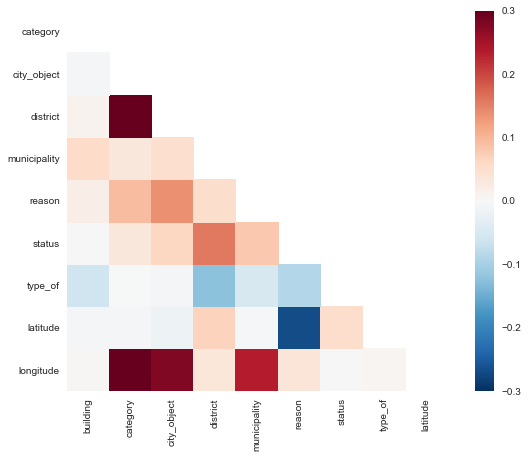

In [110]:
plot_corr(df.corr(),['building','category','city_object','district','municipality','reason','status','type_of','latitude','longitude'])